<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../images/opendata-top-transblack.png" style="width:40%"></a>
</CENTER>

# A simple introduction to data analysis in ATLAS
<p> This notebook will help you get started on analysing ATLAS data. The first step is learning how to fill histograms in order to visualise the data. </p>


<CENTER><h1>Simple pyROOT notebook example</h1></CENTER>

The library used is ROOT - a scientific software framework that provides all the functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

First of all ROOT is imported to read the files in the _.root_ data format. A _.root_ file consists of a tree having branches and leaves. At this point you could also import further programs that contain other formulas that you maybe use more often. But here we don't import other programs to keep it simple.
In order to activate the interactive visualisation of the histogram that is later created we can use the JSROOT magic activated in the second line.

In [1]:
import ROOT
## %jsroot on

Welcome to JupyROOT 6.16/00


Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file.

In [26]:
f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root")
#f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root")
print "Opened file with name ", f.GetName()

 Opened file with name  http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root


After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _my canvas_. Feel free to change it to whatever you want. The two following arguments define the width and the height of the canvas.

In [14]:
canvas = ROOT.TCanvas("Canvas","my canvas",800,600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


The next step is to define a tree named _tree_ to get the data out of the _*.root_ file.

In [15]:
tree = f.Get("mini")

Now we define a histogram that will later be placed on this canvas. Its name is _no__lep_ and the header of the histogram is _Number of leptons_. The three following arguments indicate that this histogram contains 6 bins which have a _central_ value range from 0 to 5. This means an event that contains 0 leptons will add an entry to the 1st bin (bin with central bin value 0), an event that contains 1 lepton will add an entry to the 2nd bin (bin with central bin value 1), and so on.

In [16]:
hist_no_lep = ROOT.TH1F("no_lep","Number of leptons",6,-0.5,5.5)

The following lines are a loop that goes over the data that is stored in the tree and fills the histogram that we already defined. The loop will print the event number after every 1 000 000 events so that we know how far the loop has progressed. Accordingly the loop fills the histogram for each event stored in the tree. After the program has looped over all the data it prints the word __Done!__. Be patient and wait for it to finish. : )

In [18]:
print "number of total events to loop over: ", tree.GetEntries()

for i in range(tree.GetEntries()):
    if i > 1000000: break # use this line to test the loop: this line will make the loop run only over the first 1 million events.
    if i%1000000 == 0: print "at event number ", i # this is so we know where we are as the loop can take a while to execute.
    tree.GetEntry(i)
    hist_no_lep.Fill(tree.lep_n)
    
print "Done!"
print "looped over ", i+1, "events."

number of total events to loop over:  500000
Done!
looped over  499999 events.


After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies.

In [19]:
hist_no_lep.Draw()

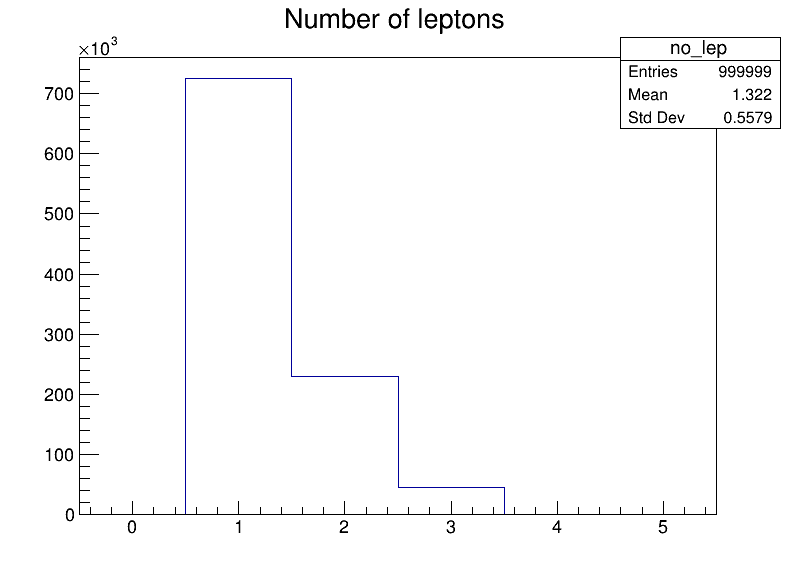

In [20]:
canvas.Draw()

Now we take the same histogram and scale the entries in each bin so that the sum of entries equal 1. This makes it easier to see how large the fraction or percentage of the occurance of a given value is. For example, if the bin with central bin value 1 has 0.45 bin entries, then we know that 45% of our events contain 1 lepton.  

In [21]:
scale = hist_no_lep.Integral()
hist_no_lep.Scale(1/scale)

In [22]:
hist_no_lep.Draw()

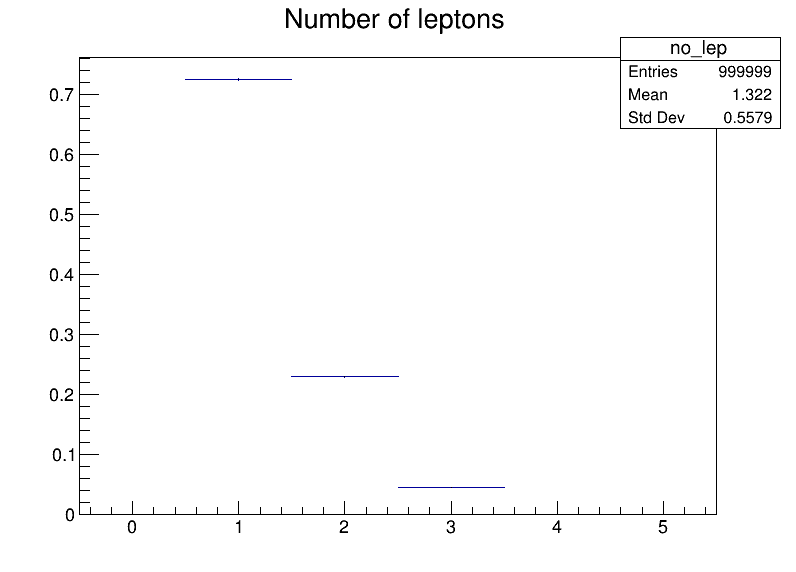

In [24]:
canvas.Draw()